
---
**Dataset** : https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction

**Problem Statement**

*   Anda sebagai data science menganalisis faktor-faktor yang mempengaruhi tarif perjalanan taxi dengan membangun model machine learning yang mampu memprediksi harga perjalanan secara akurat berdasarkan data historis agar harga yang ditawarkan lebih transparan dan adil.

**Goals**


*   Predict tarif secara akurat dan faktor apa yang mempengaruh tarif. menggunkan meodel Decision Tree, KKN, SVM, Random Forest, and XGBoost untuk meningkatkan transparansi dan keadilan harga

**Dataset Information**:

* **Trip_Distance**: Total jarak perjalanan dalam kilometer.  

* **Trip_Duration**: Lama waktu perjalanan dalam menit.  

* **Time_of_Day**: Waktu keberangkatan perjalanan (Pagi, Siang, Sore, Malam).  

* **Day_of_Week**: Hari ketika perjalanan dilakukan (Senin–Minggu).  

* **Traffic_Conditions**: Tingkat kepadatan lalu lintas saat perjalanan (Low, Moderate, High, Heavy).  

* **Weather**: Kondisi cuaca selama perjalanan (Clear, Rainy, Cloudy, Foggy).  

* **Passenger_Count**: Jumlah penumpang dalam satu perjalanan.  

* **Trip_Price**: Total tarif atau harga yang dibayarkan untuk perjalanan. 

---






# Package

In [34]:
# Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau, pearsonr
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import GridSearchCV
import pickle

# Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading berupa check duplicated, mengecek ukuran dataset, dll.

In [35]:
df = pd.read_csv('taxi_trip_pricing.csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [37]:
df.duplicated().sum()

0

In [38]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [39]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [41]:
df.iloc[1:5]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [42]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


> Temuan
- Jumlah yang tidak seimbang antar kolom
- ada mising value pada target
- dan missing value pada kolom lainnya

dari hasil kolom yang akan dijadikan target memiliki missing value, untuk imputasi kolom target butuh analisa lebih lanjut sehingga membutuhkan banyak waktu. untuk mengurangi kemungkinan terburuk pada model, akan dilakukan drop hanya kolom yang akan dijadikan target. untuk missing value pada kolom lainnya akan di handling di Feature Engineering

In [43]:
df.dropna(subset=['Trip_Price'], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       901 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Passenger_Count        903 non-null    float64
 4   Traffic_Conditions     901 non-null    object 
 5   Weather                905 non-null    object 
 6   Base_Fare              907 non-null    float64
 7   Per_Km_Rate            907 non-null    float64
 8   Per_Minute_Rate        902 non-null    float64
 9   Trip_Duration_Minutes  905 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 89.2+ KB


# EDA
> Bagian ini berisi eksplorasi data pada dataset visualisasi sederhana, hubungan antar kolom numerik, distribusi target dan lain sebagainya.

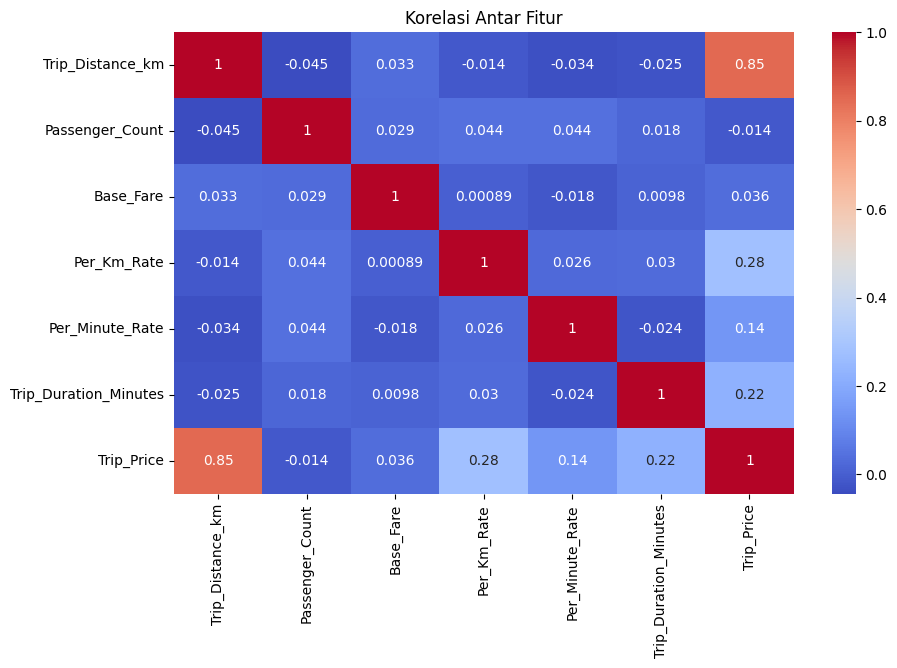

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

> Temuan
- trip_price sangat dipengaruhi trip_distance_km diikuti dengan Per_Km_Rate dan Trip_Duration_Minutes dan Base_Fare dan Passenger_Count hampir tidak punya hubungan yang jelas dengan harga perjalanan.

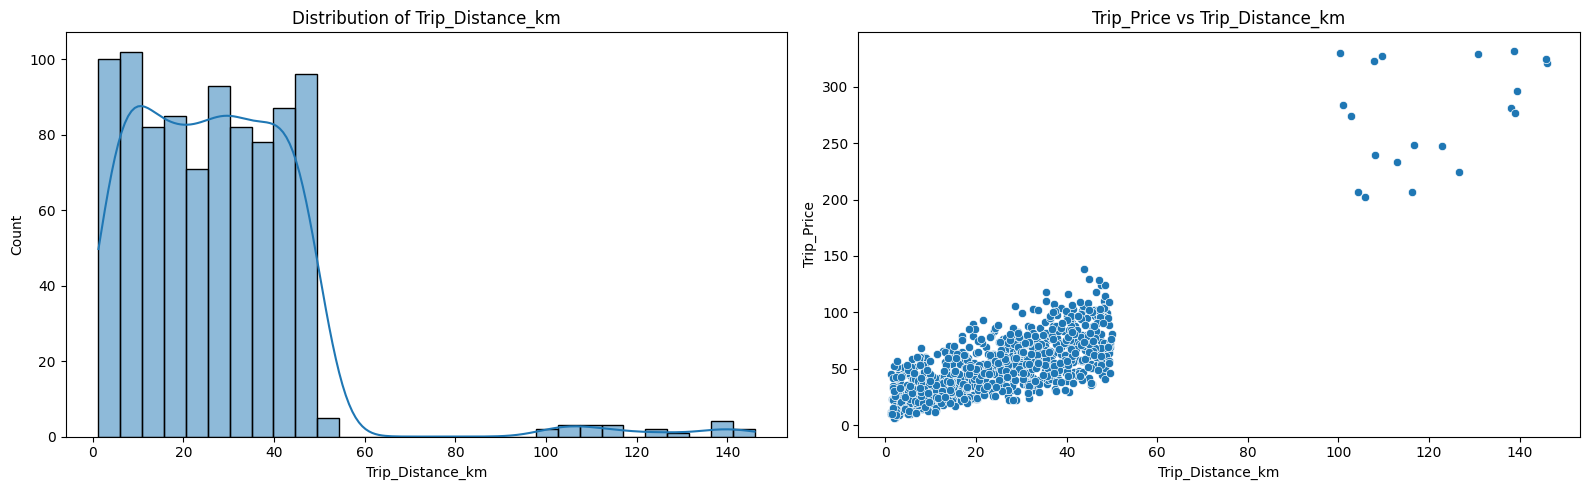

In [46]:
plt.figure(figsize=(16,5))

# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Trip_Distance_km'], kde=True, bins=30)
plt.title('Distribution of Trip_Distance_km')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df)
plt.title('Trip_Price vs Trip_Distance_km')

plt.tight_layout()
plt.show()


> temuan
- Distribusi Trip_Distance_km menunjukkan sebagian besar perjalanan taksi memiliki jarak di bawah 50 km, dengan konsentrasi tertinggi di kisaran 0–40 km
- Scatter plot memperlihatkan adanya korelasi positif antara jarak perjalanan (Trip_Distance_km) dan harga perjalanan (Trip_Price) — semakin jauh jaraknya, umumnya semakin tinggi harga perjalanan.

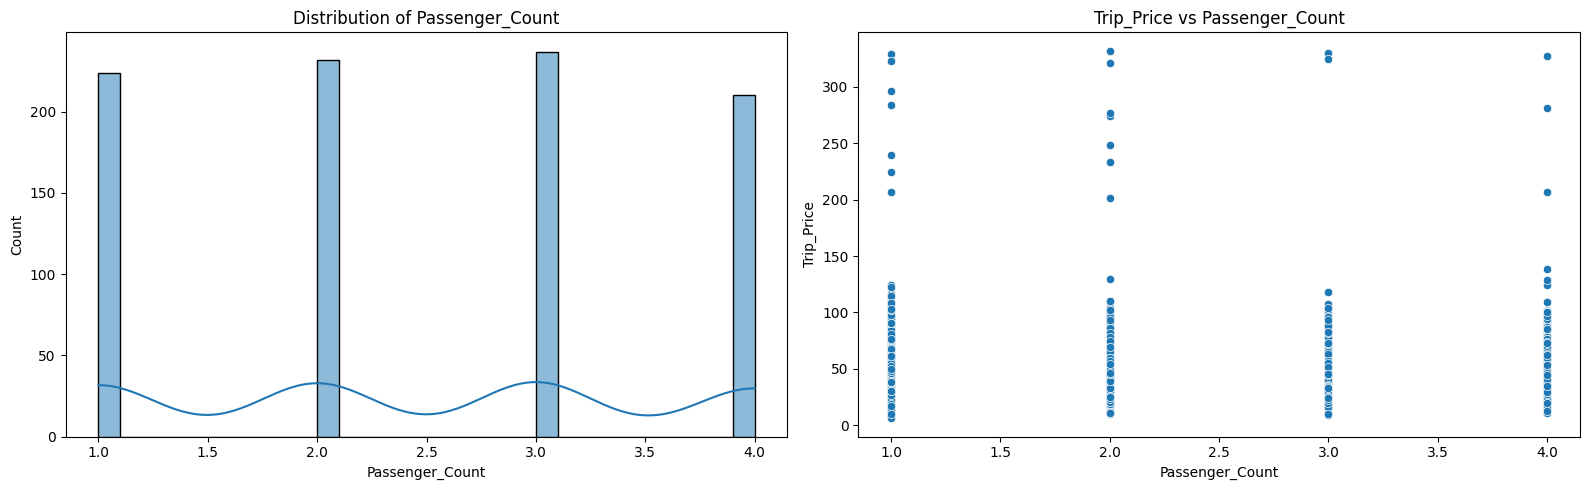

In [47]:
plt.figure(figsize=(16,5))
# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Passenger_Count'], kde=True, bins=30)
plt.title('Distribution of Passenger_Count')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Passenger_Count', y='Trip_Price', data=df)
plt.title('Trip_Price vs Passenger_Count')
plt.tight_layout()
plt.show()

> temuan
- Distribusi: Jumlah penumpang relatif merata di semua kategori (1–4).penumpang.
- Hubungan: Tidak ada korelasi signifikan antara Passenger_Count dan Trip_Price.

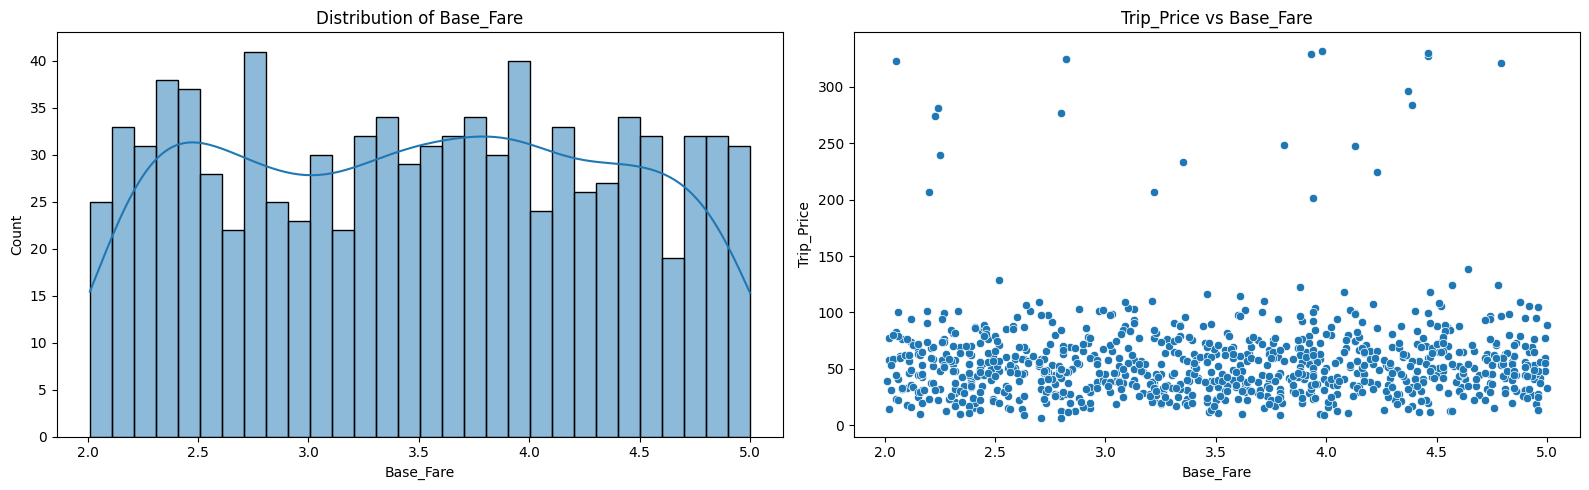

In [48]:
plt.figure(figsize=(16,5))
# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Base_Fare'], kde=True, bins=30)
plt.title('Distribution of Base_Fare')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Base_Fare', y='Trip_Price', data=df)
plt.title('Trip_Price vs Base_Fare')
plt.tight_layout()
plt.show()

> temuan
- Distribusi: Base_Fare tersebar cukup merata pada rentang 2–5, tidak ada kecenderungan nilai tertentu mendominasi.
- Hubungan: Tidak terlihat korelasi kuat antara Base_Fare dan Trip_Price artinya perubahan kecil pada tarif dasar tidak signifikan menaikkan total harga perjalanan.

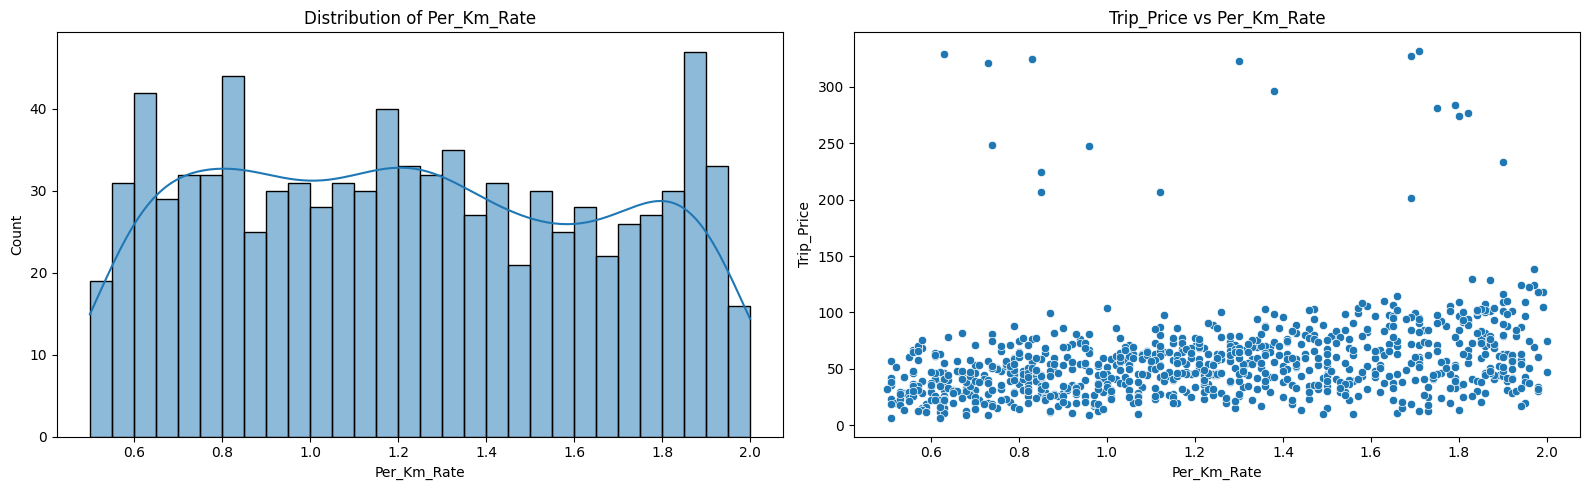

In [49]:
plt.figure(figsize=(16,5))
# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Per_Km_Rate'], kde=True, bins=30)
plt.title('Distribution of Per_Km_Rate')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Per_Km_Rate', y='Trip_Price', data=df)
plt.title('Trip_Price vs Per_Km_Rate')
plt.tight_layout()
plt.show()

> temuan
- Distribusi: Nilai tarif per km relatif merata, tanpa dominasi tarif tertentu dan menandakan sistem harga yang adaptif
- Hubungan: Tidak ada korelasi yang kuat antara tarif per km dan total harga perjalanan. Harga total lebih banyak dipengaruhi oleh kombinasi jarak dan waktu tempuh.

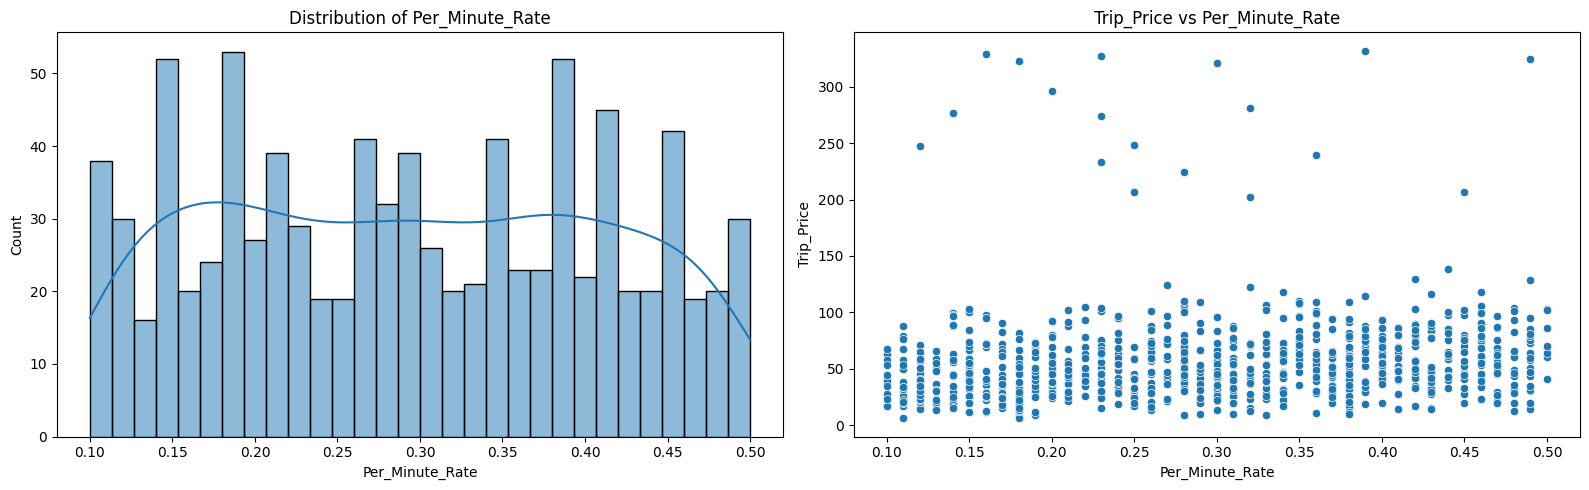

In [50]:
plt.figure(figsize=(16,5))
# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Per_Minute_Rate'], kde=True, bins=30)
plt.title('Distribution of Per_Minute_Rate')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Per_Minute_Rate', y='Trip_Price', data=df)
plt.title('Trip_Price vs Per_Minute_Rate')
plt.tight_layout()
plt.show()

> temuan
- Distribusi: Nilai tarif per menit tersebar merata antara 0.10–0.50, menunjukkan kebijakan tarif yang variatif namun terkontrol.
- Hubungan: Tidak ada korelasi yang signifikan antara tarif per menit dan total harga perjalanan. Harga total lebih banyak dipengaruhi oleh durasi perjalanan aktual dan jarak tempuh, bukan hanya tarif per menit.

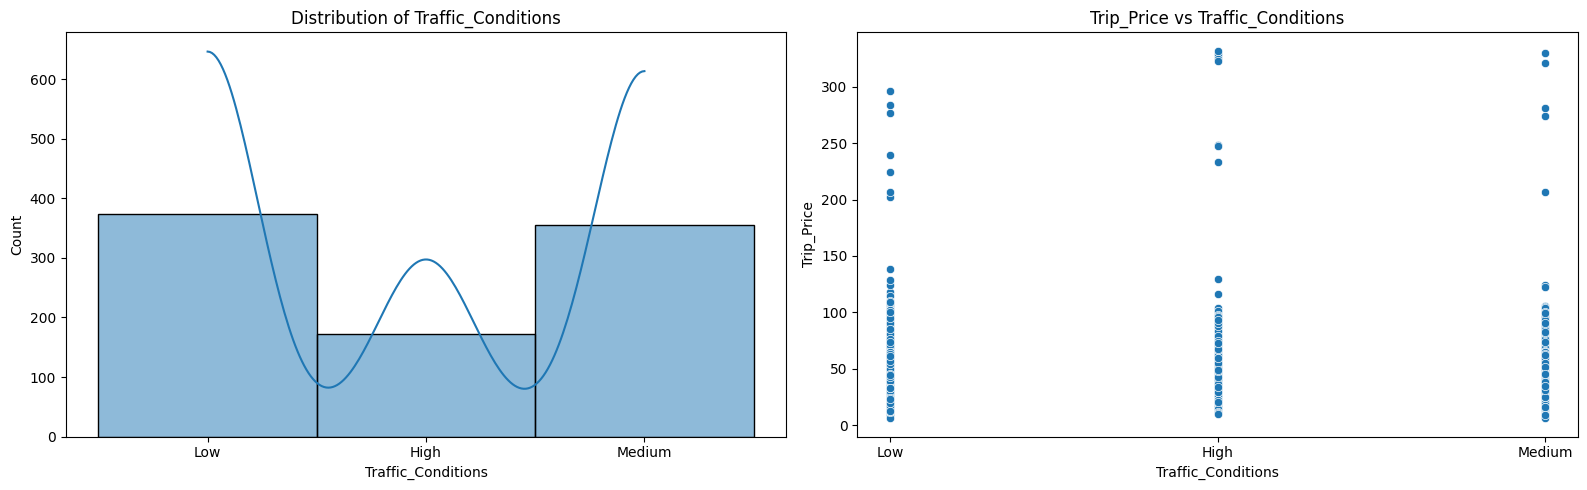

In [51]:
plt.figure(figsize=(16,5))
# Plot 1
plt.subplot(1,2,1)
sns.histplot(df['Traffic_Conditions'], kde=True, bins=30)
plt.title('Distribution of Traffic_Conditions')

# Plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='Traffic_Conditions', y='Trip_Price', data=df)
plt.title('Trip_Price vs Traffic_Conditions')
plt.tight_layout()
plt.show()

> temuan
- Distribusi: Sebagian besar perjalanan dilakukan saat lalu lintas lancar atau sedang, dengan jumlah perjalanan saat macet relatif sedikit.
- Hubungan: Terdapat kecenderungan bahwa semakin padat lalu lintas, semakin tinggi harga perjalanan, karena waktu tempuh lebih lama meskipun jarak bisa saja sama.

> kesimpulan
- Faktor yang paling berpengaruh terhadap Trip_Price adalah Trip_Distance_km, sedangkan variabel tarif (Base_Fare, Per_Km_Rate, Per_Minute_Rate) dan jumlah penumpang memiliki pengaruh lemah secara langsung.
- Kondisi lalu lintas menjadi faktor eksternal yang secara tidak langsung meningkatkan harga karena memengaruhi durasi perjalanan.
- Untuk strategi bisnis, perusahaan dapat menerapkan dynamic pricing dengan mempertimbangkan jarak, durasi, dan kondisi lalu lintas agar tarif lebih adil, kompetitif, dan mencerminkan kondisi operasional sebenarnya.

# Fueture Engginer
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, test size menggunakan 10% dari dataset, dan menggunakan colom transformer untuk transform dataset.

### Handling Cardinality

In [52]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Time_of_Day,4,"[Morning, Evening, Afternoon, Night, nan]"
1,Day_of_Week,2,"[Weekday, Weekend, nan]"
2,Traffic_Conditions,3,"[Low, High, Medium, nan]"
3,Weather,3,"[Clear, nan, Rain, Snow]"


> temuan
- tiap colom categorial memiliki low cardinality
- ada miising value pada kolom categorikal

sehingga akan dilakukan handling misiing value setelah split X dan y

### Split Betweet X (Features) and Y (target)

In [53]:
#Splitting antara X dan y

X = df.drop(['Trip_Price'], axis = 1)
y = df['Trip_Price']
X

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33
...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94


### Splitting between Train Set and Test set

In [54]:
#Splitting training & testing set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 7)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (618, 10)
Test Size (333, 10)


In [55]:
X_train.count()

Trip_Distance_km         585
Time_of_Day              581
Day_of_Week              585
Passenger_Count          585
Traffic_Conditions       584
Weather                  588
Base_Fare                589
Per_Km_Rate              593
Per_Minute_Rate          592
Trip_Duration_Minutes    588
dtype: int64

In [56]:
X_test.count()

Trip_Distance_km         316
Time_of_Day              321
Day_of_Week              320
Passenger_Count          318
Traffic_Conditions       317
Weather                  317
Base_Fare                318
Per_Km_Rate              314
Per_Minute_Rate          310
Trip_Duration_Minutes    317
dtype: int64

### Handling Outliers

In [57]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Trip_Distance_km,2.3,skewed
1,Passenger_Count,0.0,normal
2,Base_Fare,0.1,normal
3,Per_Km_Rate,0.1,normal
4,Per_Minute_Rate,0.1,normal
5,Trip_Duration_Minutes,-0.0,normal


> temuan
- hanya Trip_Distance_km yang memiliki distribusi tidak normal

maka akan dilakukan capping menggunakan package winsoreser

In [58]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Trip_Distance_km,116.92,-67.74,0.97
1,Passenger_Count,5.71,-0.77,0.00
2,Base_Fare,6.05,0.86,0.00
3,Per_Km_Rate,2.54,-0.08,0.00
4,Per_Minute_Rate,0.65,-0.05,0.00
5,Trip_Duration_Minutes,158.68,-33.63,0.00


> temuan
- Trip_Distance_km memiliki nilai extrem dengan 80% persentasi outlier

untuk mengurangi nilai extream akan dilakukan capping pada kolom tersebut

In [59]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,585.0,26.72,20.40,1.25,11.40,24.88,37.78,145.75
Passenger_Count,585.0,2.47,1.08,1.00,2.00,2.00,3.00,4.00
Base_Fare,589.0,3.45,0.87,2.01,2.71,3.45,4.17,5.00
Per_Km_Rate,593.0,1.23,0.44,0.50,0.85,1.22,1.63,1.99
Per_Minute_Rate,592.0,0.30,0.12,0.10,0.19,0.29,0.39,0.50
Trip_Duration_Minutes,588.0,62.53,32.05,5.05,36.28,63.06,89.35,119.82


In [60]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['Trip_Distance_km'],
                            missing_values='ignore')

X_train_capped = winsoriser.fit_transform(X_train)
# X_test_capped = winsoriser.transform(X_test)

In [61]:
X_train_capped.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,585.0,26.52,19.40,1.25,11.40,24.88,37.78,116.92
Passenger_Count,585.0,2.47,1.08,1.00,2.00,2.00,3.00,4.00
Base_Fare,589.0,3.45,0.87,2.01,2.71,3.45,4.17,5.00
Per_Km_Rate,593.0,1.23,0.44,0.50,0.85,1.22,1.63,1.99
Per_Minute_Rate,592.0,0.30,0.12,0.10,0.19,0.29,0.39,0.50
Trip_Duration_Minutes,588.0,62.53,32.05,5.05,36.28,63.06,89.35,119.82


In [62]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Trip_Distance_km - Before Capping


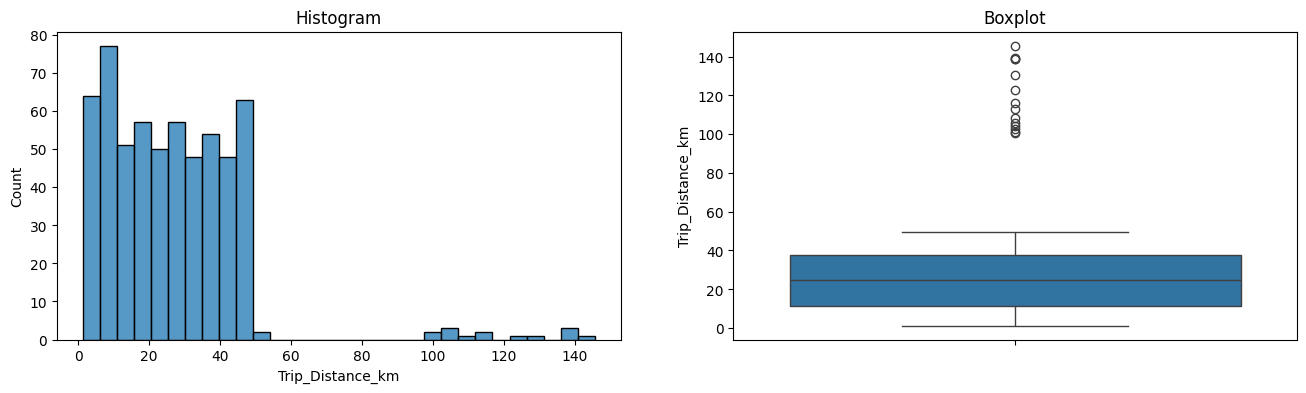


Trip_Distance_km - After Capping


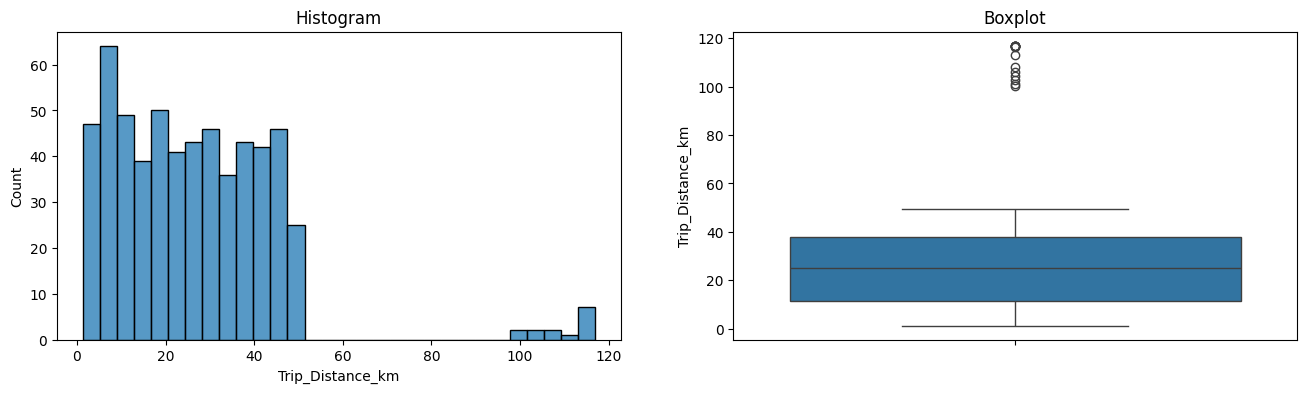

In [63]:
# Check the distribution before and after capping
# Before capping
print('Trip_Distance_km - Before Capping')
diagnostic_plots(X_train, 'Trip_Distance_km')

# After capping
print('\nTrip_Distance_km - After Capping')
diagnostic_plots(X_train_capped, 'Trip_Distance_km')



> temuan  
- Outlier ekstrem di atas 120 km sudah berhasil dikurangi, hanya tersisa sedikit titik yang masih wajar.
- Histogram menunjukkan bahwa pola distribusi lebih stabil dibanding sebelum capping.

### Handling Missing Value

#### Handling missing value X

In [64]:
X_train_capped.isnull().sum()

Trip_Distance_km         33
Time_of_Day              37
Day_of_Week              33
Passenger_Count          33
Traffic_Conditions       34
Weather                  30
Base_Fare                29
Per_Km_Rate              25
Per_Minute_Rate          26
Trip_Duration_Minutes    30
dtype: int64

##### Handling missing value kategori

In [65]:
def fill_missing_with_unknown(df, columns):
    """
    Mengisi missing value pada kolom kategorikal dengan value 'Unknown'.
    """
    return df.fillna({col: 'Unknown' for col in columns})

# daftar kolom kategori
colommedia = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# terapkan ke train & test
X_train_capped_imputed = fill_missing_with_unknown(X_train_capped, colommedia)
# X_test_capped_imputed  = fill_missing_with_unknown(X_test_capped, colommedia)


In [66]:
X_train_capped_imputed.isnull().sum()


Trip_Distance_km         33
Time_of_Day               0
Day_of_Week               0
Passenger_Count          33
Traffic_Conditions        0
Weather                   0
Base_Fare                29
Per_Km_Rate              25
Per_Minute_Rate          26
Trip_Duration_Minutes    30
dtype: int64

##### Handling Missing value numeric

In [67]:
#check distribution form skewness
num_cols = list(X_train_capped_imputed.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train_capped_imputed[col].skew(),1), np.where(
    (round(X_train_capped_imputed[col].skew(),1) <= 0.5) & (round(X_train_capped_imputed[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Trip_Distance_km,1.9,skewed
1,Passenger_Count,0.0,normal
2,Base_Fare,0.1,normal
3,Per_Km_Rate,0.1,normal
4,Per_Minute_Rate,0.1,normal
5,Trip_Duration_Minutes,-0.0,normal


In [68]:
def fill_missing_with_mean(df, columns):
    """
    Mengisi missing value pada kolom numerik dengan mean kolom.
    """
    return df.fillna({col: df[col].mean() for col in columns})


In [69]:
colommedia_numerik = ['Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes','Base_Fare','Passenger_Count']
X_train_copped_filled = fill_missing_with_mean(X_train_capped_imputed, colommedia_numerik)
# X_test_copped_filled = fill_missing_with_mean(X_test_capped_imputed, colommedia_numerik)


In [70]:
median_1 = X_train_copped_filled['Trip_Distance_km'].median()
X_train_copped_filled['Trip_Distance_km'] = X_train_copped_filled['Trip_Distance_km'].fillna(median_1)
X_train_copped_filled.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
dtype: int64

In [71]:
# median_2 = X_test_copped_filled['Trip_Distance_km'].median()
# X_test_copped_filled['Trip_Distance_km'] = X_test_copped_filled['Trip_Distance_km'].fillna(median_2)
# X_test_copped_filled.isnull().sum()

#### Handling Mising value Y

In [72]:
y_train.isnull().sum()

0

> handling miisng value categorikal 
- menggunakan menambahkan value Unkown 
sehingga value colom categori lebih bervariasi
> handling missing value numerik
- menggunakan median jika distribusi skew atau mean jika distribusi normal


### Split Between Numeric Columns and Categorical Columns

In [73]:
# Get numeric and categorical column

num_columns = X_train_copped_filled.select_dtypes(include = np.number).columns.tolist()

cat_columns = X_train_copped_filled.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
Categorical Columns :  ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']


In [74]:
#split numerical and categorical columns

X_train_num = X_train_copped_filled[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train_copped_filled[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
993,24.88,3.000000,2.65,1.35,0.296655,25.61
448,19.44,2.468376,4.04,1.82,0.470000,33.26
690,16.86,1.000000,4.09,1.34,0.450000,108.96
630,35.95,2.000000,3.13,0.92,0.410000,33.13
489,44.62,2.000000,4.47,0.55,0.440000,72.58
...,...,...,...,...,...,...
606,11.11,1.000000,3.48,0.54,0.180000,21.64
528,3.76,2.468376,4.16,1.08,0.310000,119.65
563,1.71,3.000000,3.72,1.67,0.170000,50.16
206,5.97,4.000000,4.69,1.89,0.320000,90.57


### Feature Selection

In [75]:
#get numerical and categorical columns yang udah fix

num_columns = X_train_num.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num columns : ', num_columns)
print('Cat columns : ', cat_columns)

Num columns :  ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
Cat columns :  ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']


In [76]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.5:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Time_of_Day,ga ada korelasi
1,Day_of_Week,ada korelasi
2,Traffic_Conditions,ga ada korelasi
3,Weather,ada korelasi


In [77]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Trip_Distance_km,ada korelasi
1,Passenger_Count,ga ada korelasi
2,Base_Fare,ga ada korelasi
3,Per_Km_Rate,ada korelasi
4,Per_Minute_Rate,ada korelasi
5,Trip_Duration_Minutes,ada korelasi


### Column Transformer

In [78]:
#Making column transformer for preprocessing pipeline
transformer = ColumnTransformer([
    ('numerical', Pipeline([
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]), selector(dtype_exclude='object')),
    ('categorical', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ]), selector(dtype_include='object'))])

# Model Definition
> Menggunakan model/algoritma Random Rorest, KKN, SVM, Decesion Tree dan XGBoost semua model berbentuk reggresion

In [79]:
# Pipeline untuk Random Forest Regressor
pipe_rf = Pipeline([
    ('transformer', transformer),
    ('regressor', RandomForestRegressor())
])

# Pipeline untuk K-Nearest Neighbors Regressor
pipe_knn = Pipeline([
    ('transformer', transformer),
    ('regressor', KNeighborsRegressor())
])

# Pipeline untuk Support Vector Regressor (SVM)
pipe_svm = Pipeline([
    ('transformer', transformer),
    ('regressor', SVR())
])

# Pipeline untuk Decision Tree Regressor
pipe_dt = Pipeline([
    ('transformer', transformer),
    ('regressor', DecisionTreeRegressor(random_state=7))
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBRegressor())
])

# Model Training

In [80]:
# Training Random Forest Regressor
pipe_rf.fit(X_train_copped_filled, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027045521A00>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000270455218B0>)])),
                ('regressor', RandomForestRegressor())])

In [81]:
pipe_knn.fit(X_train_copped_filled, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027045521A00>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000270455218B0>)])),
                ('regressor', KNeighborsRegressor())])

In [82]:
pipe_svm.fit(X_train_copped_filled, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027045521A00>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000270455218B0>)])),
                ('regressor', SVR())])

In [83]:
pipe_dt.fit(X_train_copped_filled, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027045521A00>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000270455218B0>)])),
                ('regressor', DecisionTreeRegressor(random_state=7))])

In [84]:
pipe_xgb.fit(X_train_copped_filled, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027045521A00>),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# Model Evaluasi

### X_train_copped_filled dengan y_train menggunkan evaluasi MAE, MSE, RMSE dan R2

In [85]:
# === Prediksi dengan model ===
y_pred = pipe_rf.predict(X_train_copped_filled)

# === Evaluasi model ===
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: Random Forest Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: Random Forest Regressor ===
Mean Absolute Error (MAE)       : 2.3101
Mean Squared Error (MSE)        : 17.8447
Root Mean Squared Error (RMSE)  : 4.2243
R-squared (R²)                  : 0.9895


In [86]:
# === Prediksi dengan model ===
y_pred = pipe_knn.predict(X_train_copped_filled)

# === Evaluasi model ===
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: KKN Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: KKN Regressor ===
Mean Absolute Error (MAE)       : 9.2888
Mean Squared Error (MSE)        : 178.9957
Root Mean Squared Error (RMSE)  : 13.3789
R-squared (R²)                  : 0.8949


In [87]:
# === Prediksi dengan model ===
y_pred = pipe_svm.predict(X_train_copped_filled)

# === Evaluasi model ===
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: SVM Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: SVM Regressor ===
Mean Absolute Error (MAE)       : 14.1897
Mean Squared Error (MSE)        : 1157.3421
Root Mean Squared Error (RMSE)  : 34.0197
R-squared (R²)                  : 0.3204


In [88]:
# === Prediksi dengan model ===
y_pred = pipe_dt.predict(X_train_copped_filled)

# === Evaluasi model ===
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: Decesion Tree Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: Decesion Tree Regressor ===
Mean Absolute Error (MAE)       : 0.0000
Mean Squared Error (MSE)        : 0.0000
Root Mean Squared Error (RMSE)  : 0.0000
R-squared (R²)                  : 1.0000


In [89]:
# === Prediksi dengan model ===
y_pred = pipe_xgb.predict(X_train_copped_filled)

# === Evaluasi model ===
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: XGBoost Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: XGBoost Regressor ===
Mean Absolute Error (MAE)       : 0.0850
Mean Squared Error (MSE)        : 0.0163
Root Mean Squared Error (RMSE)  : 0.1278
R-squared (R²)                  : 1.0000


> temuan
- dari pengujian MAE, MSE, RMSE dan R2 train pada tiap moodel
- Decesion Tree unggul dari semua model baik dari mae, mse, rmse dan r2 bisa dibilang sempurna dalam train

### X_test dengan y_test menggunkan evaluasi MAE, MSE, RMSE dan R2

In [90]:
# === Prediksi dengan model ===
y_pred = pipe_rf.predict(X_test)

# === Evaluasi model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: Random Forest Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: Random Forest Regressor ===
Mean Absolute Error (MAE)       : 6.2292
Mean Squared Error (MSE)        : 97.0535
Root Mean Squared Error (RMSE)  : 9.8516
R-squared (R²)                  : 0.9358


In [91]:
# === Prediksi dengan model ===
y_pred = pipe_knn.predict(X_test)

# === Evaluasi model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: KKN Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: KKN Regressor ===
Mean Absolute Error (MAE)       : 11.3376
Mean Squared Error (MSE)        : 225.3193
Root Mean Squared Error (RMSE)  : 15.0106
R-squared (R²)                  : 0.8509


In [92]:
# === Prediksi dengan model ===
y_pred = pipe_svm.predict(X_test)

# === Evaluasi model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: SVM Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: SVM Regressor ===
Mean Absolute Error (MAE)       : 13.2204
Mean Squared Error (MSE)        : 1093.3632
Root Mean Squared Error (RMSE)  : 33.0660
R-squared (R²)                  : 0.2765


In [93]:
# === Prediksi dengan model ===
y_pred = pipe_dt.predict(X_test)

# === Evaluasi model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: Decesion Tree Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: Decesion Tree Regressor ===
Mean Absolute Error (MAE)       : 9.3870
Mean Squared Error (MSE)        : 191.3360
Root Mean Squared Error (RMSE)  : 13.8324
R-squared (R²)                  : 0.8734


In [94]:
# === Prediksi dengan model ===
y_pred = pipe_xgb.predict(X_test)

# === Evaluasi model ===
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# === Tampilkan hasil ===
print("=== Model Evaluation: XGBoost Regressor ===")
print(f"Mean Absolute Error (MAE)       : {mae:.4f}")
print(f"Mean Squared Error (MSE)        : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE)  : {rmse:.4f}")
print(f"R-squared (R²)                  : {r2:.4f}")


=== Model Evaluation: XGBoost Regressor ===
Mean Absolute Error (MAE)       : 5.8380
Mean Squared Error (MSE)        : 79.9188
Root Mean Squared Error (RMSE)  : 8.9397
R-squared (R²)                  : 0.9471


> temuan
- dari pengujian MAE, MSE, RMSE dan R2 test pada tiap model
- hanya random forest unggul dari semua model baik dari mae, mse, rmse dan r2

untuk lebih rincinya akan dilakukan model compare

# Model Best Comparation

### R2 scoring

In [95]:
# ====== MODELS ======
models = {
    'KNN'              : pipe_knn,
    'SVR'              : pipe_svm,
    'Decision Tree'    : pipe_dt,
    'Random Forest'    : pipe_rf,
    'XGBoost'          : pipe_xgb
}

# ====== CV & SCORING ======
cv = KFold(n_splits=3, shuffle=True, random_state=7)
scoring = 'r2'

# ====== EVALUATION ======
df_cv = pd.DataFrame(columns=models.keys(),
                     index=['Train Mean', 'Train Std', 'Test Mean', 'Test Std'],
                     dtype=float)

for name, est in models.items():
    cvres = cross_validate(
        est, X_test, y_test,
        cv=cv, scoring=scoring,
        return_train_score=True
    )

    # Ambil hasil train dan test score
    train_scores = cvres['train_score']
    test_scores  = cvres['test_score']

    # Masukkan ke DataFrame
    df_cv.loc['Train Mean', name] = train_scores.mean()
    df_cv.loc['Train Std',  name] = train_scores.std()
    df_cv.loc['Test Mean',  name] = test_scores.mean()
    df_cv.loc['Test Std',   name] = test_scores.std()

# (Opsional) urutkan model berdasarkan Test Mean (semakin tinggi R² semakin baik)
order = df_cv.loc['Test Mean'].sort_values(ascending=False).index
df_cv = df_cv[order]

# Tampilkan hasil
print("=== Cross Validation Results (R² only) ===")
df_cv

=== Cross Validation Results (R² only) ===


,Random Forest,Decision Tree,XGBoost,KNN,SVR
Train Mean,0.984670,1.000000,9.999999e-01,0.783687,0.136325
Train Std,0.002110,0.000000,4.339765e-08,0.039438,0.017724
Test Mean,0.913205,0.827042,7.964347e-01,0.613721,0.116794
Test Std,0.006005,0.023232,1.382258e-01,0.175282,0.046348


### MAE scoring

In [96]:
# ====== MODELS ======
models = {
    'KNN'              : pipe_knn,
    'SVR'              : pipe_svm,
    'Decision Tree'    : pipe_dt,
    'Random Forest'    : pipe_rf,
    'XGBoost'          : pipe_xgb
}

# ====== CV & SCORING ======
cv = KFold(n_splits=3, shuffle=True, random_state=7)
scoring = 'neg_mean_absolute_error'

# ====== EVALUATION ======
df_cv = pd.DataFrame(columns=models.keys(),
                     index=['Train Mean', 'Train Std', 'Test Mean', 'Test Std'],
                     dtype=float)

for name, est in models.items():
    cvres = cross_validate(
        est, X_test, y_test,
        cv=cv, scoring=scoring,
        return_train_score=True
    )

    # Ambil hasil train dan test score
    train_scores = cvres['train_score']
    test_scores  = cvres['test_score']

    # Masukkan ke DataFrame
    df_cv.loc['Train Mean', name] = train_scores.mean()
    df_cv.loc['Train Std',  name] = train_scores.std()
    df_cv.loc['Test Mean',  name] = test_scores.mean()
    df_cv.loc['Test Std',   name] = test_scores.std()

# (Opsional) urutkan model berdasarkan Test Mean (semakin tinggi R² semakin baik)
order = df_cv.loc['Test Mean'].sort_values(ascending=False).index
df_cv = df_cv[order]

# Tampilkan hasil
print("=== Cross Validation Results (MAE only) ===")
df_cv

=== Cross Validation Results (MAE only) ===


,Random Forest,XGBoost,Decision Tree,KNN,SVR
Train Mean,-3.024709,-0.005826,0.000000,-10.189819,-18.181077
Train Std,0.158190,0.002251,0.000000,0.394490,0.750437
Test Mean,-7.683722,-8.531662,-12.064685,-12.694882,-18.784217
Test Std,0.348690,1.213199,0.971647,1.202658,1.405034


> temuan dengan scoring MAE
- jika mendekati 0 maka model tersebut bagus
- dari hasil MSE dengan sample dan rata2 test, random forest yang terbaik atau paling mendekati 0

> temuan dengan scoring R2
- jika mendekati 1 maka nilai tersebut bagus
- dari hasil R2 dengan sample dan rata2 train semua model hampir mendekati 1, tapi random forestlah yang memiliki overfit terkecil

sehingga untuk best model saya memilih random forest sebagai best model dan akan dilanjutkan hyper tuning guna memperkecil overfiting


# Hyper Tuning

In [97]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)
param_rf_reg = {
    'regressor__n_estimators': [1,100],
    'regressor__max_depth': [2,4,8],
    'regressor__min_samples_split': [10],
    'regressor__min_samples_leaf': [2]
}

grid_rf_reg = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_rf_reg,
    cv=cv,
    scoring='r2'
   
)

# === training ===
grid_rf_reg.fit(X_train_copped_filled, y_train)

# === evaluasi ===
print("Best Params :", grid_rf_reg.best_params_)
print("Best CV R²  :", grid_rf_reg.best_score_)
print("Train R²    :", grid_rf_reg.score(X_train_copped_filled, y_train))
print("Test R²     :", grid_rf_reg.score(X_test, y_test))

Best Params : {'regressor__max_depth': 8, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
Best CV R²  : 0.9300151694270358
Train R²    : 0.9621991059956458
Test R²     : 0.932151322352305


> temuan
- hasil setekah tuning hampir seimbang tidak overfit dan underfit

sehingga dapat melanjutkan saving model untuk inference

# Saving

In [98]:
# ambil model terbaik dari GridSearch
best_rf_model = grid_rf_reg.best_estimator_

# simpan ke file
with open('best_random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

# Kesimpulan

> Pengerjaan
- Data loading

saya melakukan drop value nan hanya pada kolom target(trip_price) dikarenakan menghindari kemungkinan terburuk pada model. dan akan membutuhkan waktu lama untuk analisis dalam imputasi.
- EDA

saya melakukan explorasi sederhana distribusi dan hubungan fitur dan target 
- Fueture Engginer

tidak ditemukan High Cardinal, Split X dan y dengan test size 0.1 dari dataset. handling missing value categori dengan menambah value Unkown, handling missing value distribussi normal meggunakan mean dan jika tidak normal menggunkkan median untuk trasform menggunakan standarscaler dan onehotencoder dalam kolom transformer
- Model

saya menggunakan pipline untuk semua model, Random Forest, KKN, SVM, XGBoost, Decesion Tree dengan random_state 7. Evaluasi dari 5 model tersebut saya menggunakan MAE, MSE, RMSE, R2 dan cross_validate dari hasil model evaluasi, best model saya pakai Random Forest karena dari pengujian set test R2 nya mendekati 1 dan Overfiting kurang dari 10%. lalu dituning sehingga set train dengan set test seimbang dengan jarak 0.01 dalam pengujian R2. dan lanjut saving model untuk inference

In [99]:
y_pred = pipe_rf.predict(X_test)
y_pred1 = pipe_rf.predict(X_train_copped_filled)
pertama = r2_score(y_test, y_pred)
kedua = r2_score(y_train, y_pred1)
ketiiga = grid_rf_reg.score(X_test, y_test)
keempat = grid_rf_reg.score(X_train_copped_filled, y_train)

print("=== Perbadingan ===")
print('Before Tuning')
print("Train R²",kedua)
print('Test R²', pertama)
print('After Tuning')
print('Train R²',keempat)
print('Test R²', ketiiga)


=== Perbadingan ===
Before Tuning
Train R² 0.9895218488366214
Test R² 0.9357785394795404
After Tuning
Train R² 0.9621991059956458
Test R² 0.932151322352305


> Hasil perbandingan sebelum dituning dengan sesudah dituning dalam pengujian R2
- setelah dituning tidak ada overfitting dan underfitting dalam model

### Predict tarif dan faktor apa yang mempengaruh tarif  menggunkan meodel Decision Tree, KKN, SVM, Random Forest, and XGBoost 

untuk predict akan dilanjutkan di inference. faktor atau fitur yang mempengaruhi tarif dari keluhan pelanggan dari model

In [100]:
# Pengaruh antara fitur dengan target
rf = best_rf_model.named_steps['regressor']
feature_names = best_rf_model.named_steps['transformer'].get_feature_names_out()
importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("=== Feature Importance ===")
importance


=== Feature Importance ===


,Feature,Importance
0,numerical__Trip_Distance_km,0.814496
3,numerical__Per_Km_Rate,0.086355
5,numerical__Trip_Duration_Minutes,0.063906
4,numerical__Per_Minute_Rate,0.030317
2,numerical__Base_Fare,0.002371
7,categorical__Day_of_Week,0.000861
1,numerical__Passenger_Count,0.000581
8,categorical__Traffic_Conditions,0.000446
6,categorical__Time_of_Day,0.000392
9,categorical__Weather,0.000276


dari hasil semua fitur atau faktor memiliki pengaruh terhadap tarif(target).fitur Trip_Distance_km sangat signifikan dalam pengaruh target dengan 80%

### Kegunaan Model

> Pelanggan
- Model ini membantu pelanggan memprediksi tarif perjalanan taksi dengan akurat, transparan, dan adil.
- Pelanggan dapat memperkirakan biaya perjalanan dengan faktor-faktor tertentu sebelum memesan, sehingga meminimalkan ketidakpastian dan meningkatkan kepercayaan terhadap layanan.

> Pelaku Bisnis
- Membangun Slogan Taxi 
- Harga dihitung berdasarkan jarak dan waktu tempuh Anda tanpa biaya tersembunyi.

sehingga meningkatkan kepercayaan pelanggan terhadap tarif perjalanan taxi dan mendorong pelanggan menggunakan Taxi sebagai angkutan terpercaya